In [ ]:
1. Off market 
    
2. Location
3. Schools 
4. 

In [1]:
#!pip install jupyter_dashboards
#!jupyter dashboards quick-setup --sys-prefix

#!jupyter nbextension install --py jupyter_dashboards --sys-prefix
#!jupyter nbextension enable --py jupyter_dashboards --sys-prefix


In [2]:
%matplotlib inline

In [1]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import collections



## https://valuation.property.nsw.gov.au/embed/propertySalesInformation

In [9]:
#list zip files in the data folder
my_data_lst = ! ls -l data/zippedfiles/*.zip
my_data_lst = ["".join(i.split(" ")[-1:]) for i in my_data_lst]


In [10]:
my_data_lst

['data/zippedfiles/2017.zip',
 'data/zippedfiles/20180115.zip',
 'data/zippedfiles/20180122.zip',
 'data/zippedfiles/20180129.zip',
 'data/zippedfiles/20180205.zip',
 'data/zippedfiles/20180212.zip',
 'data/zippedfiles/20180219.zip',
 'data/zippedfiles/20180226.zip',
 'data/zippedfiles/20180305.zip',
 'data/zippedfiles/20180312.zip',
 'data/zippedfiles/20180319.zip',
 'data/zippedfiles/20180326.zip',
 'data/zippedfiles/20180402.zip',
 'data/zippedfiles/20180409.zip',
 'data/zippedfiles/20180416.zip',
 'data/zippedfiles/20180423.zip',
 'data/zippedfiles/20180430.zip',
 'data/zippedfiles/20180507.zip',
 'data/zippedfiles/20180514.zip',
 'data/zippedfiles/20180521.zip',
 'data/zippedfiles/20180528.zip',
 'data/zippedfiles/20180604.zip',
 'data/zippedfiles/20180611.zip',
 'data/zippedfiles/20180618.zip',
 'data/zippedfiles/20180625.zip',
 'data/zippedfiles/20180702.zip',
 'data/zippedfiles/20180709.zip',
 'data/zippedfiles/20180716.zip',
 'data/zippedfiles/20180723.zip',
 'data/zippedfiles

In [12]:
new_list = ['data/zippedfiles/20180827.zip','data/zippedfiles/20180903.zip', 'data/zippedfiles/20180910.zip','data/zippedfiles/20180917.zip'
        ]

In [13]:
for i in new_list:
    print(i)

data/zippedfiles/20180827.zip
data/zippedfiles/20180903.zip
data/zippedfiles/20180910.zip
data/zippedfiles/20180917.zip


In [15]:
# unzip the file and move the files 
for zfiles in new_list:
    print(zfiles)
    zip_ref = zipfile.ZipFile(zfiles, 'r')
    zip_ref.extractall("data/")
    zip_ref.close()
#! mv data/2017.zip data/zippedfiles/

data/zippedfiles/20180827.zip
data/zippedfiles/20180903.zip
data/zippedfiles/20180910.zip
data/zippedfiles/20180917.zip


In [1]:
#! mv data/2017.zip data/zippedfiles/ 

In [24]:
my_dat_lst = ! ls -l data/temp/*.DAT

In [25]:
my_dat_lst[:10]

['-rw-r--r-- 1 jovyan users 17848 Sep 21  2018 data/temp/001_SALES_DATA_NNME_03092018.DAT',
 '-rw-r--r-- 1 jovyan users 22285 Sep 21  2018 data/temp/001_SALES_DATA_NNME_10092018.DAT',
 '-rw-r--r-- 1 jovyan users 18439 Sep 21  2018 data/temp/001_SALES_DATA_NNME_17092018.DAT',
 '-rw-r--r-- 1 jovyan users  8391 Sep 21  2018 data/temp/001_SALES_DATA_NNME_27082018.DAT',
 '-rw-r--r-- 1 jovyan users  1231 Sep 21  2018 data/temp/002_SALES_DATA_NNME_03092018.DAT',
 '-rw-r--r-- 1 jovyan users  1207 Sep 21  2018 data/temp/002_SALES_DATA_NNME_10092018.DAT',
 '-rw-r--r-- 1 jovyan users   993 Sep 21  2018 data/temp/002_SALES_DATA_NNME_17092018.DAT',
 '-rw-r--r-- 1 jovyan users   695 Sep 21  2018 data/temp/002_SALES_DATA_NNME_27082018.DAT',
 '-rw-r--r-- 1 jovyan users 22499 Sep 21  2018 data/temp/004_SALES_DATA_NNME_03092018.DAT',
 '-rw-r--r-- 1 jovyan users 26381 Sep 21  2018 data/temp/004_SALES_DATA_NNME_10092018.DAT']

In [51]:
my_dat_lst[1].split(" ")[-1:]
#("/".join(my_dat_lst[1].split("/")[1:]))

['data/001_SALES_DATA_NNME_02012017.DAT']

In [26]:
# list the DAT files path
my_dat_lst = ! ls -l data/temp/*.DAT
my_dat_lst_updated = [("/".join(i.split(" ")[-1:])) for i in my_dat_lst]

In [10]:
# move all the DAT files to unzipped folder
my_dat = !find data/*.DAT -type f -follow -print 
import shutil
for f in my_dat:
    shutil.move(f, "data/unzipped/")
    

In [27]:
dat_files = ! find data/temp/*.DAT -type f -follow -print 

In [28]:
len(dat_files) --7603

8129

In [29]:
#dat_files
# Check for duplicates 
print ([item for item, count in collections.Counter(dat_files).items() if count > 1])


[]


# Process data and save as csv file

In [29]:
for i in dat_files:
    A_str = ""
    B_str = ""
    C_str = ""
    D_str = ""
    Z_str = ""
    with open(i) as f:
        lis=[line.split() for line in f]
        for i in lis:
            if ("".join(i)).split(";")[0] == 'A':
                A_str =  A_str + ";".join(("".join(i)).split(";")) + "\n"
            if ("".join(i)).split(";")[0] == 'B':
                B_str = B_str + ";".join(("".join(i)).split(";")) + "\n"
            if ("".join(i)).split(";")[0] == 'C':
                C_str = C_str + ";".join(("".join(i)).split(";")) + "\n"
            if ("".join(i)).split(";")[0] == 'D':
                D_str = D_str + ";".join(("".join(i)).split(";")) + "\n"
            if ("".join(i)).split(";")[0] == 'Z':
                Z_str = Z_str + ";".join(("".join(i)).split(";")) + "\n"
    with open("data/processed/A_str.csv", "a") as a_myfile:
        a_myfile.write(A_str)
    with open("data/processed/B_str.csv", "a") as b_myfile:
        b_myfile.write(B_str)
    with open("data/processed/C_str.csv", "a") as c_myfile:
        c_myfile.write(C_str)
    with open("data/processed/D_str.csv", "a") as d_myfile:
        d_myfile.write(D_str)
    with open("data/processed/Z_str.csv", "a") as z_myfile:
        z_myfile.write(Z_str)


# Read sold data and process 

In [239]:
import csv

cols = """Record_Type
District Code
Property Id
Sale Counter
Download Date Time
Property Name
Property Unit Number
Property House Number
Property Street Name
Property Locality
Property Post Code
Area
Area Type
Contract Date
Settlement Date
Purchase Price
Zoning
Nature of Property
Primary Purpose
Strata Lot Number
Component code
Sale Code
Percentage Interest of Sale
Dealing Number
Empty"""
col_header = [((i.replace(" ","_").replace("\n", ",")).split(",")) for i in cols.split('/n')]


df = pd.read_csv("data/processed/B_str.csv", sep=';', error_bad_lines=False, quoting=csv.QUOTE_NONE, encoding='utf-8')
df.columns = col_header[0]
df['Download_Date'] = pd.to_datetime(df['Download_Date_Time'].str[:8]) 

In [283]:
df_dedup.columns

Index(['Record_Type', 'District_Code', 'Property_Id', 'Sale_Counter',
       'Download_Date_Time', 'Property_Name', 'Property_Unit_Number',
       'Property_House_Number', 'Property_Street_Name', 'Property_Locality',
       'Property_Post_Code', 'Area', 'Area_Type', 'Contract_Date',
       'Settlement_Date', 'Purchase_Price', 'Zoning', 'Nature_of_Property',
       'Primary_Purpose', 'Strata_Lot_Number', 'Component_code', 'Sale_Code',
       'Percentage_Interest_of_Sale', 'Dealing_Number', 'Empty',
       'Download_Date'],
      dtype='object')

In [240]:
df_dedup = df.drop_duplicates(subset=[i for i in df.columns if i != 'Download_Date'], keep=False)

In [284]:
df_dedup.head(1)


,Record_Type,District_Code,Property_Id,Sale_Counter,Download_Date_Time,Property_Name,Property_Unit_Number,Property_House_Number,Property_Street_Name,Property_Locality,...,Zoning,Nature_of_Property,Primary_Purpose,Strata_Lot_Number,Component_code,Sale_Code,Percentage_Interest_of_Sale,Dealing_Number,Empty,Download_Date
0,B,1,2005.0,2,2017050101:00,NaN,NaN,29,ARMIDALEST,ABERMAIN,...,R2,R,RESIDENCE,NaN,AAM,NaN,0.0,AM321605,NaN,2017-05-01


In [265]:
for i in a:
    print(i)

R
V
3


In [266]:
df_time_ser_price = df_dedup[(df_dedup.Nature_of_Property == 'R')]\
                            [['Download_Date','Property_Locality', "Purchase_Price"]]\
                            .groupby(['Property_Locality','Download_Date'])\
                            .agg(['mean','count'])
df_time_ser_price =  df_time_ser_price.reset_index()
df_time_ser_price.columns = ["Property_Locality","date_sold","Purchase_Price","sold_counts"]
df_time_ser_price_Locality = df_time_ser_price[(df_time_ser_price.Property_Locality).isin([2167,2148,2147])]

In [287]:
("Glendenning".upper())

'GLENDENNING'

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

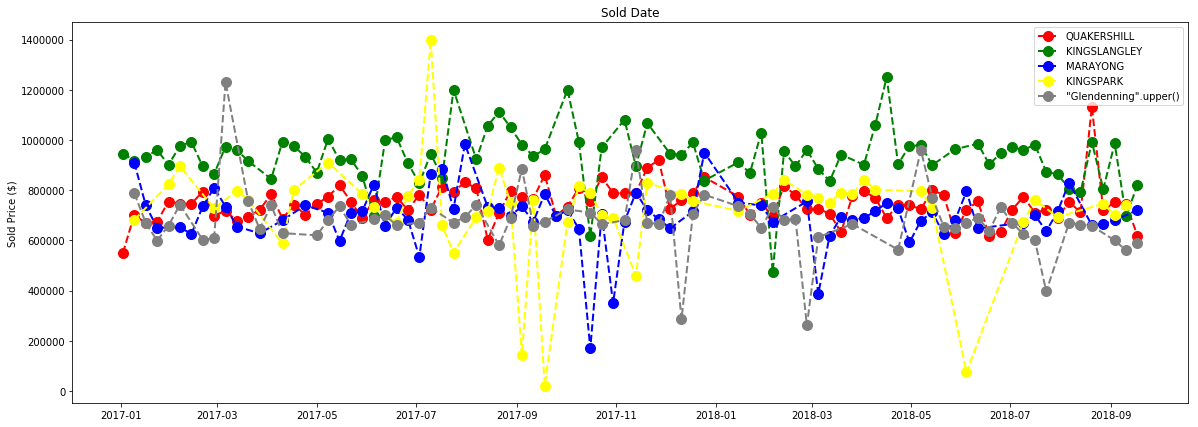

In [288]:
plt.figure(figsize=(20,7))
plt.plot(df_time_ser_price[(df_time_ser_price.Property_Locality=="QUAKERSHILL")]["date_sold"], 
         df_time_ser_price[(df_time_ser_price.Property_Locality=="QUAKERSHILL")]['Purchase_Price'], 
         color='red', marker='o', linestyle='dashed', linewidth=2, markersize=10,
         label = 'QUAKERSHILL')
plt.plot(df_time_ser_price[(df_time_ser_price.Property_Locality=="KINGSLANGLEY")]["date_sold"], 
         df_time_ser_price[(df_time_ser_price.Property_Locality=="KINGSLANGLEY")]['Purchase_Price'], 
         color='green', marker='o', linestyle='dashed', linewidth=2, markersize=10,
         label = 'KINGSLANGLEY')
plt.plot(df_time_ser_price[(df_time_ser_price.Property_Locality=="MARAYONG")]["date_sold"], 
         df_time_ser_price[(df_time_ser_price.Property_Locality=="MARAYONG")]['Purchase_Price'], 
         color='Blue', marker='o', linestyle='dashed', linewidth=2, markersize=10,
         label = 'MARAYONG')
plt.plot(df_time_ser_price[(df_time_ser_price.Property_Locality=="KINGSPARK")]["date_sold"], 
         df_time_ser_price[(df_time_ser_price.Property_Locality=="KINGSPARK")]['Purchase_Price'], 
         color='Yellow', marker='o', linestyle='dashed', linewidth=2, markersize=10,
         label = 'KINGSPARK')

plt.plot(df_time_ser_price[(df_time_ser_price.Property_Locality=="Glendenning".upper())]["date_sold"], 
         df_time_ser_price[(df_time_ser_price.Property_Locality=="Glendenning".upper())]['Purchase_Price'], 
         color='Gray', marker='o', linestyle='dashed', linewidth=2, markersize=10,
         label = '"Glendenning".upper()')




plt.ylabel('Sold Price ($)') 
plt.title('Sold Date')
plt.legend();
plt

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

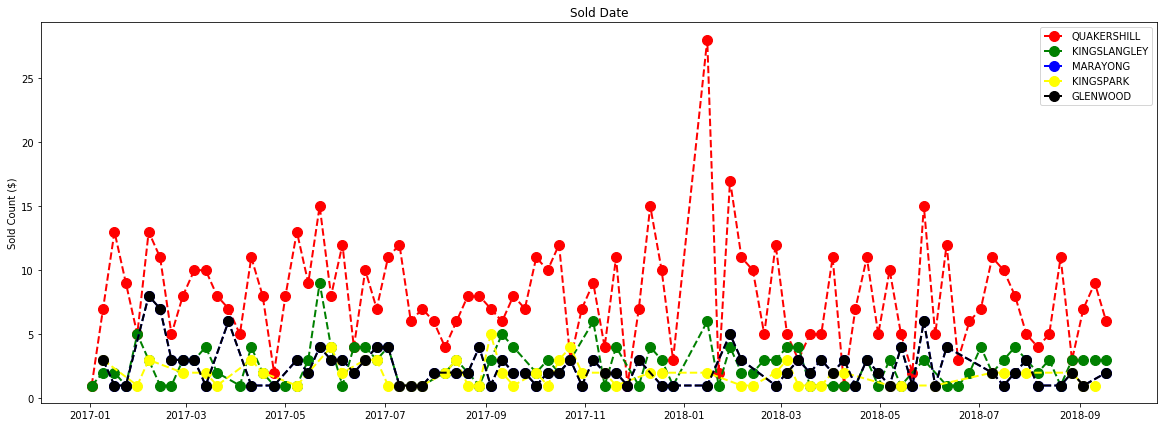

In [268]:
plt.figure(figsize=(20,7))
plt.plot(df_time_ser_price[(df_time_ser_price.Property_Locality=="QUAKERSHILL")]["date_sold"], 
         df_time_ser_price[(df_time_ser_price.Property_Locality=="QUAKERSHILL")]['sold_counts'], 
         color='red', marker='o', linestyle='dashed', linewidth=2, markersize=10,
         label = 'QUAKERSHILL')
plt.plot(df_time_ser_price[(df_time_ser_price.Property_Locality=="KINGSLANGLEY")]["date_sold"], 
         df_time_ser_price[(df_time_ser_price.Property_Locality=="KINGSLANGLEY")]['sold_counts'], 
         color='green', marker='o', linestyle='dashed', linewidth=2, markersize=10,
         label = 'KINGSLANGLEY')
plt.plot(df_time_ser_price[(df_time_ser_price.Property_Locality=="MARAYONG")]["date_sold"], 
         df_time_ser_price[(df_time_ser_price.Property_Locality=="MARAYONG")]['sold_counts'], 
         color='Blue', marker='o', linestyle='dashed', linewidth=2, markersize=10,
         label = 'MARAYONG')
plt.plot(df_time_ser_price[(df_time_ser_price.Property_Locality=="KINGSPARK")]["date_sold"], 
         df_time_ser_price[(df_time_ser_price.Property_Locality=="KINGSPARK")]['sold_counts'], 
         color='Yellow', marker='o', linestyle='dashed', linewidth=2, markersize=10,
         label = 'KINGSPARK')
plt.plot(df_time_ser_price[(df_time_ser_price.Property_Locality=="MARAYONG")]["date_sold"], 
         df_time_ser_price[(df_time_ser_price.Property_Locality=="MARAYONG")]['sold_counts'], 
         color='Black', marker='o', linestyle='dashed', linewidth=2, markersize=10,
         label = 'GLENWOOD')



plt.ylabel('Sold Count ($)') 
plt.title('Sold Date')
plt.legend();
plt

In [269]:
plt.plot?

In [270]:
plt.figure(figsize=(20,7))
#x=df_time_ser_price['date_sold']
plt.plot(df_time_ser_price[(df_time_ser_price.Property_Post_Code==2167)]["date_sold"], 
         df_time_ser_price[(df_time_ser_price.Property_Post_Code==2167)]['Purchase_Price'], 
         color='red', marker='o', linestyle='solid', linewidth=2, markersize=10,
         label = 'Quakers_hill')
plt.plot(df_time_ser_price[(df_time_ser_price.Property_Post_Code==2147)]["date_sold"], 
         df_time_ser_price[(df_time_ser_price.Property_Post_Code==2147)]['Purchase_Price'], 
         color='green', marker='o', linestyle='solid', linewidth=2, markersize=10,
         label = 'Kings_Langly')
plt.plot(df_time_ser_price[(df_time_ser_price.Property_Post_Code==2148)]["date_sold"], 
         df_time_ser_price[(df_time_ser_price.Property_Post_Code==2148)]['Purchase_Price'], 
         color='Blue', marker='o', linestyle='solid', linewidth=2, markersize=10,
         label = 'BlackTown')
plt.ylabel('Sold count - in no.') 
plt.title('Sold Date')
plt.legend();
plt

AttributeError: 'DataFrame' object has no attribute 'Property_Post_Code'

<Figure size 1440x504 with 0 Axes>

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

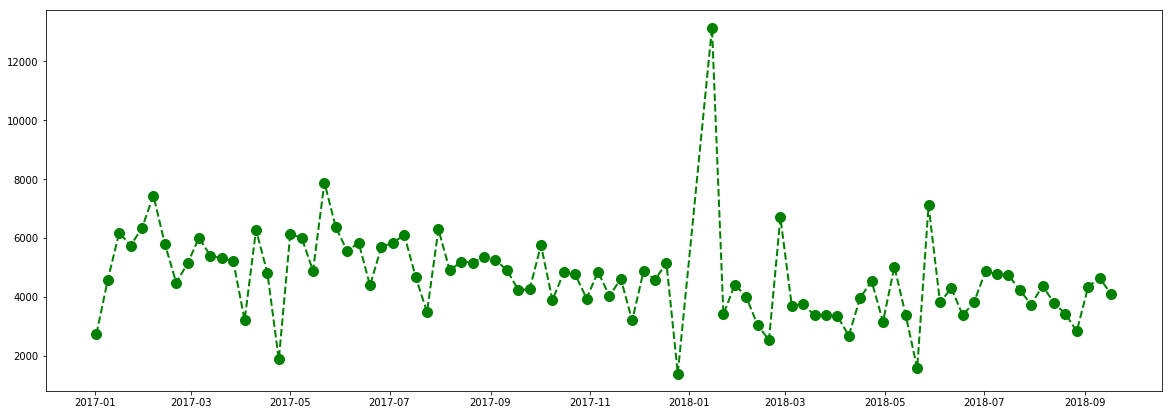

In [32]:
df_time_ser = df[['Download_Date','Property_Post_Code']].groupby(['Download_Date']).agg(['count'])
df_time_ser_col =  df_time_ser.reset_index()
df_time_ser_col.columns = ["date_sold","no_property_sold"]
plt.figure(figsize=(20,7))
x=df_time_ser_col['date_sold']
y=df_time_ser_col['no_property_sold']
plt.plot(x,y , color='green', marker='o', linestyle='dashed', linewidth=2, markersize=10)
plt

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

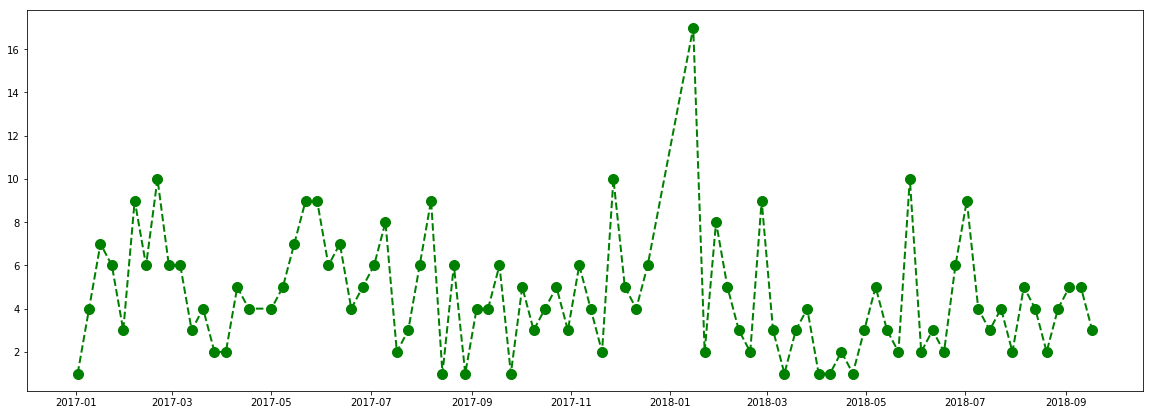

In [36]:
#df_time_ser = df[(df.Property_Post_Code == 2150)].df[['Download_Date','Property_Post_Code']].groupby(['Download_Date']).agg(['count'])
df_time_ser = df[(df.Property_Post_Code == 2763) & 
                 (df.Primary_Purpose == 'RESIDENCE')][['Download_Date','Property_Post_Code']].groupby(['Download_Date']).agg(['count'])
df_time_ser_col =  df_time_ser.reset_index()
df_time_ser_col.columns = ["date_sold","no_property_sold"]
plt.figure(figsize=(20,7))
x=df_time_ser_col['date_sold']
y=df_time_ser_col['no_property_sold']
plt.plot(x,y , color='green', marker='o', linestyle='dashed', linewidth=2, markersize=10)
plt

In [37]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).mean()
    #pd.rolling_std(timeseries, window=12)
    
    #rolmean = pd.rolling_mean(timeseries, window=12)
    #rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [38]:
df_time_ser.head(1)

,Property_Post_Code
,sum
Download_Date,
2017-01-02,8301.0


In [39]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df_time_ser, autolag='AIC')
#dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#for key,value in dftest[4].items():
#    dfoutput['Critical Value (%s)'%key] = value
#print (dfoutput)

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

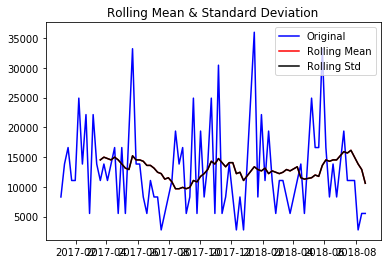

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [40]:
test_stationarity(df_time_ser)

In [41]:
time_ser = df[]

SyntaxError: invalid syntax (<ipython-input-41-4e2f40d90da1>, line 1)

In [42]:
pd_coffee_survay_1['Download_Date'] = pd_coffee_survay_1['Download_Date_Time'].dt.date
df_timeseries = pd_coffee_survay_1[['to_Date','shop_name', 'Taste_Quantity','Price','Service_Speed', 'Atmosphere_Friendliness', 'Walking_Distance']].groupby(['to_Date']).agg(['mean'])
df_timeseries["Score"] = df_timeseries.sum(axis=1)
df_timeseries = df_timeseries.reset_index()
timeseries = df_timeseries[['to_Date','Score']]


plt.figure(figsize=(20,7))
x=timeseries['to_Date']
y=timeseries['Score']
plt.plot(x,y , color='green', marker='o', linestyle='dashed', linewidth=2, markersize=10)
plt

NameError: name 'pd_coffee_survay_1' is not defined

In [95]:
df[df.Property_Post_Code ==2150].cou

,Record_Type,District_Code,Property_Id,Sale_Counter,Download_Date_Time,Property_Name,Property_Unit_Number,Property_House_Number,Property_Street_Name,Property_Locality,...,Purchase_Price,Zoning,Nature_of_Property,Primary_Purpose,Strata_Lot_Number,Component_code,Sale_Code,Percentage_Interest_of_Sale,Dealing_Number,Empty
1317,B,89,834151.0,20,2018070901:15,NaN,79,68,MACARTHURST,PARRAMATTA,...,567000,NaN,R,RESIDENCE,79.0,NaN,NaN,0.0,AN447924,NaN
1318,B,89,834151.0,21,2018070901:15,NaN,181,66,MACARTHURST,PARRAMATTA,...,567000,NaN,R,RESIDENCE,181.0,NaN,NaN,0.0,AN447924,NaN
1319,B,89,842598.0,22,2018070901:15,NaN,31,70,PHILLIPST,PARRAMATTA,...,1060000,NaN,3,COMMERCIAL,31.0,NaN,NaN,0.0,AN463728,NaN
1324,B,89,834803.0,27,2018070901:15,NaN,NaN,97,MACQUARIEST,PARRAMATTA,...,15250000,B4,3,COMMERICAL,NaN,PRP,BSO,0.0,AN205595,NaN
1334,B,89,855740.0,37,2018070901:15,NaN,1,12,WIGRAMST,HARRISPARK,...,443000,NaN,R,RESIDENCE,1.0,NaN,NaN,0.0,AN445634,NaN
1336,B,89,854608.0,39,2018070901:15,NaN,56,64,GREATWESTERNHWY,PARRAMATTA,...,532000,NaN,R,RESIDENCE,56.0,NaN,NaN,0.0,AN475384,NaN
1337,B,89,854777.0,40,2018070901:15,NaN,21,22,GREATWESTERNHWY,PARRAMATTA,...,280000,NaN,R,RESIDENCE,21.0,NaN,NaN,0.0,AN459742,NaN
1338,B,89,854777.0,41,2018070901:15,NaN,124,22,GREATWESTERNHWY,PARRAMATTA,...,328000,NaN,R,RESIDENCE,124.0,NaN,NaN,0.0,AN472134,NaN
1341,B,89,4055531.0,44,2018070901:15,NaN,105,2,AMOSSTBLOCKA,PARRAMATTA,...,780000,NaN,R,RESIDENCE,17.0,NaN,NaN,0.0,AN466735,NaN
1345,B,89,4100785.0,48,2018070901:15,NaN,10,26,TENNYSONST,PARRAMATTA,...,530000,NaN,R,RESIDENCE,10.0,NaN,NaN,0.0,AN474309,NaN


In [84]:
len(col_header[0])

26